In [1]:
import random
import math
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random.seed(time.time()) #To get a "really" random generator 

In [3]:
class Cell ( object) :
    
    next_ID = 0
    
    def __init__(self, state = "NORMAL", fitness = 1, mutation_rate = 0.001):
        self.state = state
        self.fitness = fitness
        self.mutation_rate = mutation_rate
        self.ID = Cell.next_ID
        self.treatment_duration = 0
        Cell.next_ID += 1
        
    def __str__(self):
        return "Cell #{0} of type : {1}".format(self.ID, self.state)
    
    def become_cancerous_or_not (self):
        proba = random.uniform(0, 0.002)
        if self.mutation_rate > proba :
            self.state = "CANCEROUS"
            self.fitness = fc
            self.mutation_rate = mu_c
    
    def apoptose (self):
        self.state = "DEAD"
        
    def treatment (self, alpha):
        self.fitness = self.fitness * alpha
        self.treatment_duration += 1

In [4]:
class Tissue ( object ) :
    
    def __init__(self, omega, alpha, fitness_n, fitness_c, mutation_rate_n, mutation_rate_c, generation_time):
        self.fitness_n = fitness_n
        self.fitness_c = fitness_c
        self.mutation_rate_n = mutation_rate_n
        self.mutation_rate_c = mutation_rate_c
        self.generation_time = generation_time
        self.omega = omega
        self.alpha = alpha
        self.pop = []
     
    def create_cell (self, state, fitness, mutation_rate):
        return ( Cell (state, fitness, mutation_rate) )
        
    
    def initial_population (self, N = 1000, prop_cancer = 0.05):
        nb_cancer_cells = round (prop_cancer *N)
        
        for i in range(N):
            if ( i < nb_cancer_cells) :
                state = "CANCEROUS"
                fitness = self.fitness_c
                mutation_rate = self.mutation_rate_c

            else :
                state = "NORMAL"
                fitness = self.fitness_n
                mutation_rate = self.mutation_rate_n
                
                
            new_cell = self.create_cell (state, fitness, mutation_rate)
            self.pop.append(new_cell)

    def stats(self):
        nb_cells = len( self.pop )
        nb_cancer_cells = 0
        nb_normal_cells = 0
        nb_dead = 0
        detection = False
        
        
        for cell in self.pop:
            if cell.state == "NORMAL":
                nb_normal_cells += 1
            elif cell.state == "CANCEROUS" :
                nb_cancer_cells += 1
            elif cell.state == "DEAD" :
                nb_dead += 1
                
            if nb_cancer_cells > self.omega * nb_cells :
                detection = True
            
        return (nb_cells, nb_normal_cells, nb_cancer_cells, detection)
            
    def get_treatment(self):
        if (self.stats()[3] == True ): #if the cancer has been detected 
            for cell in self.pop:
                if (cell.state == "CANCEROUS") and (cell.treatment_duration < self.generation_time):
                    cell.treatment(self.alpha)
    
    def reproduce (self):
        proba = random.uniform(0, 1)
        minimum = 1
        candidat = self.pop[0]
        
        for cell in self.pop :
            #selection of an individual with a proba proportional to the fitness
            #i.e. minimize the différence between the proba and the fitness
            if ( abs( cell.fitness - proba) < minimum):
                minimum = abs( cell.fitness - proba)
                candidat = cell
        
        new_cell = self.create_cell(candidat.state, candidat.fitness, candidat.mutation_rate)

        if new_cell.state == "NORMAL":
            new_cell.become_cancerous_or_not()
        
        self.pop.append(new_cell)
    
    def get_apoptose(self):
        cell = random.choice(self.pop)
        self.pop.remove(cell)
        cell.apoptose()

The simulation with a while loop takes a lot of time (it ends very rarely), maybe this is due to my code. Besides, in order to have a simulation, I decided to replace the while loop by a for loop.

In [5]:
def simulation (nb_runs, omega, alpha, fn, fc, mu_n, mu_c, T, treatment = True, verbose = True):
    
    my_tissue = Tissue(omega , alpha, fn, fc, mu_n, mu_c, T)
    my_tissue.initial_population(N = 1000, prop_cancer = 0.1) #initial population of 1000 individus
    
    if verbose:
        print("Initilisation : ")
        print ( "Total number of cells : {}, number of normal cells : {}, number of cancerous cells : {}".format(my_tissue.stats()[0], my_tissue.stats()[1], my_tissue.stats()[2]), "\n" ) 

    for i in range (nb_runs):
        my_tissue.reproduce()
        my_tissue.get_apoptose()
        
        if (treatment) :
            my_tissue.get_treatment()
        
        nb_cells, nb_normal_cells, nb_cancer_cells, detection = my_tissue.stats()
    
    if verbose :
        print ( "Statistics after", nb_runs, "runs : ")
        print ( "Total number of cells : {}, number of normal cells : {}, number of cancerous cells : {}".format(nb_cells, nb_normal_cells, nb_cancer_cells, "\n" ) ) 
    
    return (my_tissue.stats())

In [6]:
N = 10000 #number of runs for the simulation with the for - loop 

mu_n = 0.001 #mutation rate for normal cells
mu_c = 0.010 #mutation rate for cancerous cells

fn = 1 #fitness for normal cells
fc = 0.85 #fitness for cancerous cells

# Detection of the cancer :

omega = 0.25 #cutoff for the cancer-detection
alpha = 1/8 #treatment constant that reduces fitness for cancerous cells
T = 50 #number of generations the treatment is still efficient

In [7]:
#Without treatment :

simulation1 = simulation (N, omega, alpha, fn, fc, mu_n, mu_c, T, treatment=False, verbose=True)

Initilisation : 
Total number of cells : 1000, number of normal cells : 900, number of cancerous cells : 100 

Statistics after 10000 runs : 
Total number of cells : 1000, number of normal cells : 35, number of cancerous cells : 965


In [8]:
#With treatment :

simulation2 = simulation (N, omega, alpha, fn, fc, mu_n, mu_c, T, treatment=True, verbose=True)

Initilisation : 
Total number of cells : 1000, number of normal cells : 900, number of cancerous cells : 100 

Statistics after 10000 runs : 
Total number of cells : 1000, number of normal cells : 255, number of cancerous cells : 745


In [9]:
def shannon_diversity (N, n):
    p = n/N
    return (- p *  math.log(p, 2)) #napierian logarithm

In [10]:
shannon_diversity (1000, simulation1[2]) #without treatment

0.04960018216891177

In [11]:
shannon_diversity (1000, simulation2[2]) #with treatment

0.3163923136378596

Here is a new simulation to see the effect of alpha on the treatment :

In [12]:
simulations = [ ]
#We have 10 simulations for 10 alphas different (complexity of 100)
#Each simulation make 1000 inner runs ( or iterations )

alpha2 = np.linspace(0, 1,10)
for a in alpha2:
    run = []
    for i in range(10):
        run.append (simulation (1000, omega, a, fn, fc, mu_n, mu_c, T, treatment=True, verbose = False)[2]) #just the cancerous cells
    simulations.append(run)

In [13]:
print(simulations)

[[529, 533, 541, 547, 539, 541, 508, 517, 536, 515], [528, 535, 530, 534, 524, 534, 513, 522, 546, 529], [533, 517, 553, 546, 525, 573, 551, 551, 529, 547], [572, 553, 527, 532, 521, 530, 554, 553, 541, 542], [547, 539, 543, 537, 556, 551, 539, 545, 555, 528], [556, 541, 549, 565, 533, 572, 558, 540, 569, 554], [573, 558, 568, 586, 578, 560, 546, 567, 572, 564], [573, 561, 586, 564, 565, 564, 561, 580, 581, 562], [596, 587, 592, 608, 596, 607, 592, 589, 593, 579], [637, 643, 641, 650, 632, 653, 646, 625, 633, 639]]


In [14]:
#Compute the means of cancerous cells for each alpha :

concat_simu = []
for lst in range(len(simulations)):
    sum_ = 0
    for i in simulations[lst]:
        sum_ += i
    concat_simu.append(sum_/10)

In [15]:
concat_simu

[530.6, 529.5, 542.5, 542.5, 544.0, 553.7, 567.2, 569.7, 593.9, 639.9]

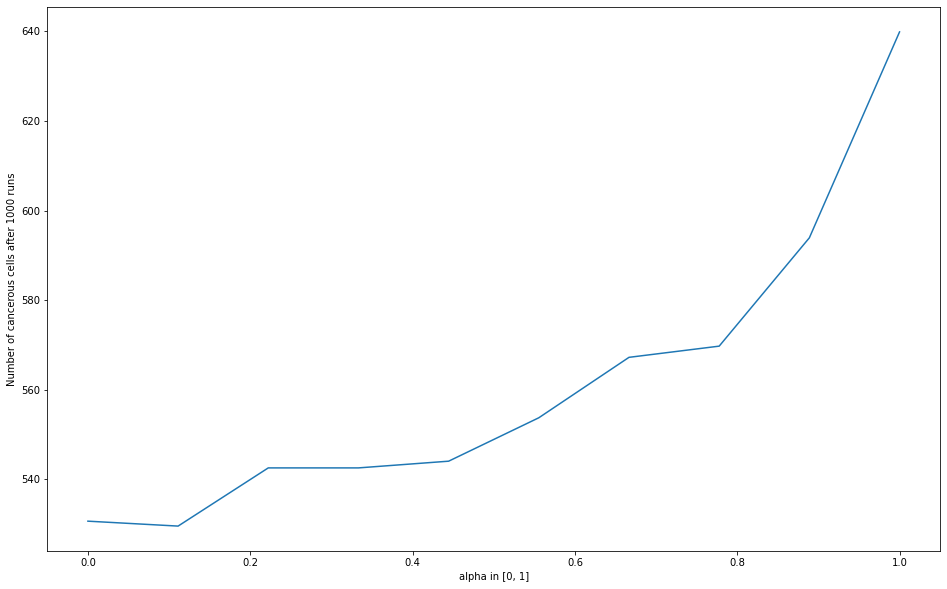

In [16]:
plt.figure(figsize=(16, 10))
plt.plot(alpha2, concat_simu)
plt.xlabel("alpha in [0, 1]")
plt.ylabel("Number of cancerous cells after 1000 runs")
plt.show()